In [31]:
from time import sleep
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np

matrices = []

features = np.random.randint(1, high=100, dtype=int)
x = np.random.randint(features, high=104, dtype=int)
outputs = np.random.randint(1, high=100, dtype=int)
matrices.append(np.random.uniform(-1, 1, size=(features, x)).transpose())
matrices.append(np.random.uniform(-1, 1, size=(x, outputs)))
matrices.append(np.random.uniform(-1, 1, size=(x, x)))



/tmp/ipykernel_17082/1234296433.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


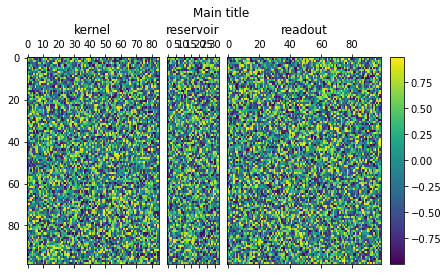

In [94]:
def print_matrices(matrices, name, path=None, units_per_inch=50,
				   titles=["kernel", "reservoir", "readout"],
				   y_visible=[True, False, False]):
	width_ratios = [
		matrices[0].shape[1],
		matrices[1].shape[1],
		matrices[2].shape[1],
	]

	x = (sum(width_ratios) / units_per_inch) + 2
	y = (max(width_ratios) / units_per_inch) + 2

	fig = plt.figure(figsize=(x,y))

	gs = gridspec.GridSpec(nrows=1, ncols=len(matrices), figure=fig, height_ratios=[1], width_ratios=width_ratios,
						   wspace=0.08, top=1-0.20, right=1-0.15 , bottom=0.075, left=0.075)
	fig.suptitle(name, y=0.975)

	axes = []
	axes.append(fig.add_subplot(gs[0]))
	axes.append(fig.add_subplot(gs[1], sharey = axes[0]))
	axes.append(fig.add_subplot(gs[2], sharey = axes[0]))

	c = None
	for axe, matrix, title, visible in zip(axes, matrices, titles, y_visible):
		c = axe.matshow(matrix, aspect='auto')
		y_size = matrix.shape[1]
		if y_size <= 30:
			print(title, y_size)
			axe.set_xticks([int(0), int(y_size)])
		axe.get_yaxis().set_visible(visible)
		axe.set_title(title)

	# Add the lateral colorbar with the same size of other bars
	pos = axes[2].get_position()
	cax = fig.add_axes(rect=[pos.x0 + pos.width + 0.02,
						pos.y0,
						0.03,
						pos.height])
	fig.colorbar(mappable=c, cax=cax)

	if path is not None:
		fig.savefig(path + "/" + name + ".svg", format='SVG', dpi=units_per_inch)
	fig.show()


print_matrices(matrices, "test", "/tmp")